# Glauber on infinite random $k$-regular graph
Compute magnetization in the thermodynamic limit $N\to\infty$.

Reproduce the results in *Barthel et. al*, [Matrix product algorithm for stochastic dynamics on networks applied to nonequilibrium Glauber dynamics](https://doi.org/10.1103/PhysRevE.97.010104) for $k=3$.

In [2]:
using MatrixProductBP, MatrixProductBP.Models
using Plots
import ProgressMeter; ProgressMeter.ijulia_behavior(:clear);

┌ Info: Precompiling MatrixProductBP [3d39929c-b583-45fa-b331-3f50b693a38a]
└ @ Base loading.jl:1662


In [3]:
include("../../telegram/notifications.jl")

default_tg_text (generic function with 1 method)

In [4]:
q = q_glauber   # number of states is 2 for spin variables
T = 50          # final time
k = 3           # degree
m⁰ = 0.5;       # magnetization at time zero

In [5]:
svd_trunc = TruncBond(14)
maxiter = 100
tol = 1e-3
A, iters, Δs, b = glauber_infinite_graph(T, k, m⁰; svd_trunc, maxiter, tol);

Iterating BP on infinite graph  15%|███▏                 |  ETA: 0:09:14
  iter:  15/100
  Δ:     0.0012384/0.001

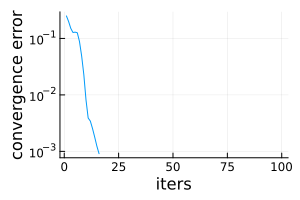

In [6]:
plot(Δs, ylabel="convergence error", xlabel="iters", yaxis=:log10, 
    size=(300,200), label="")

In [7]:
U = HomogeneousGlauberFactor
magnetiz = [marginal_to_expectation(bb, U) for bb in b];

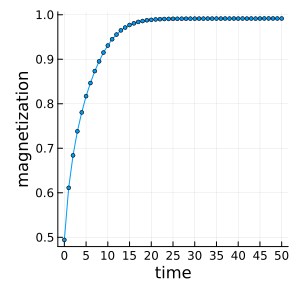

In [8]:
plot(0:T, magnetiz, m=:o, xlabel="time", ylabel="magnetization", label="",
    size=(300,300), xticks=0:5:T, ms=2)

Compare with:

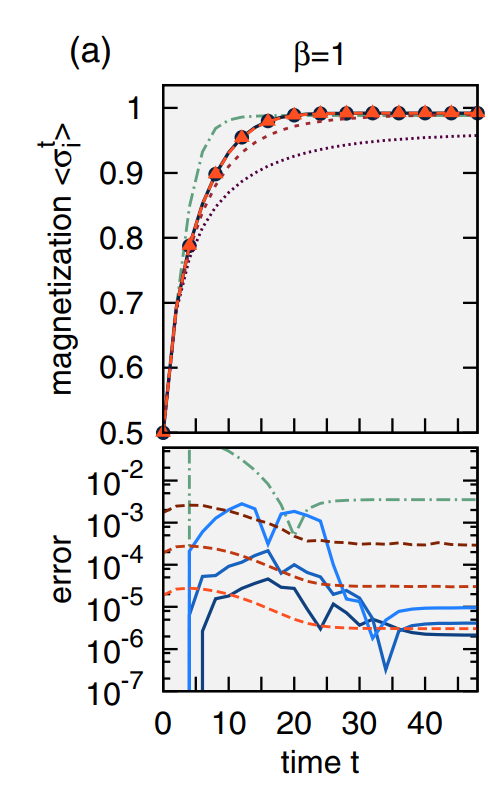

In [9]:
@telegram "glauber infinite" begin
@time begin
c = autocovariance(A, U)
end
end

Computing beliefs at pairs of times (t,u) 100%|██████████| Time: 1:30:45
  t:  50
  u:  51


5746.600851 seconds (9.56 M allocations: 255.955 GiB, 0.61% gc time, 0.08% compilation time)


51×51 Matrix{Float64}:
 0.0  -0.000439465   0.298833     -0.000433453  …   1.39378e-5    1.41306e-5
 0.0   0.0          -0.000741287   0.312848         1.94182e-5    1.97583e-5
 0.0   0.0           0.0          -0.000769255      2.24121e-5    2.27428e-5
 0.0   0.0           0.0           0.0              2.39981e-5    2.43979e-5
 0.0   0.0           0.0           0.0              2.53199e-5    2.56477e-5
 0.0   0.0           0.0           0.0          …   2.55247e-5    2.59023e-5
 0.0   0.0           0.0           0.0              2.63633e-5    2.6622e-5
 0.0   0.0           0.0           0.0              2.57549e-5    2.60552e-5
 0.0   0.0           0.0           0.0              2.58156e-5    2.5975e-5
 0.0   0.0           0.0           0.0              2.40851e-5    2.42846e-5
 0.0   0.0           0.0           0.0          …   2.31767e-5    2.32341e-5
 0.0   0.0           0.0           0.0              2.02352e-5    2.03294e-5
 0.0   0.0           0.0           0.0              1.8

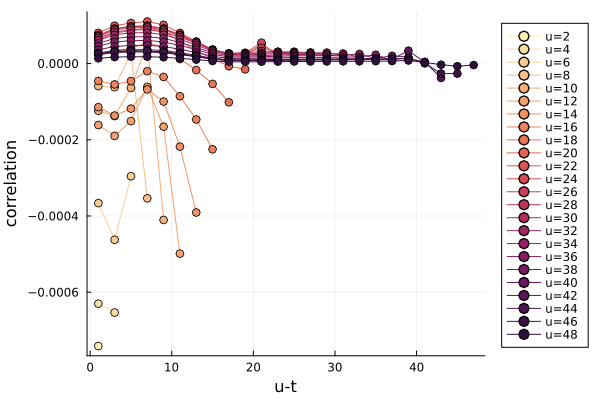

In [12]:
using ColorSchemes
us = 2:2:(T-1)
cg = cgrad(:matter, length(us), categorical=true)
pl = plot(xlabel="u-t", ylabel="correlation", legend=:outertopright)
for (j,u) in enumerate(us)
    plot!(pl, 1:2:u-1, c[2:2:u,u+1], label="u=$u", m=:o, c=cg[j]) 
end
pl